# Biochemical Kinetic Diagram Analysis

This is a basic overview of how to analyze kinetic diagrams using SciPy packages such as NumPy, NetworkX, MatPlotLib, and SymPy, as well as some code that utilizes the methods of Hill to generate diagrams and calculate state probabiliites analytically. 

## Diagram

The usual case is that someone will have constructed a diagram that represents the given system they want to model. A common starting point would then be a picture of their model, used to explain the processes and relationships between states. This is a diagram for a 6 state antiporter cycle, which is the example that will be used here:

<div>
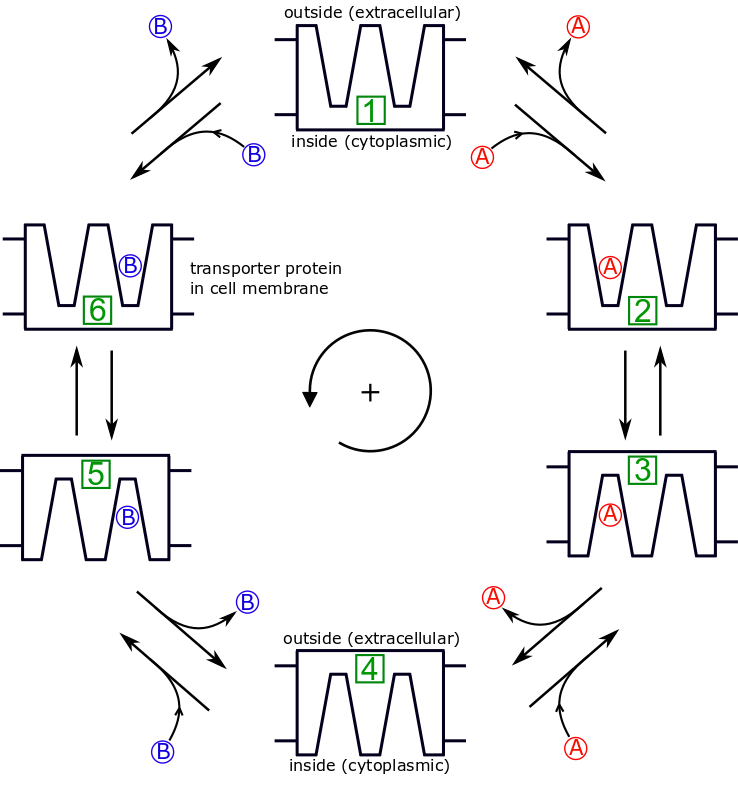
</div>

In this diagram there are 12 arrows, 2 between each pair of states. Each arrow represents its own process and thus has its own rate constant. These rate constants are normally indexed, where $k_{ij}$ respresents the rate going from state $i$ to state $j$. So for this diagram there are 12 rate constants: $k_{12}$, $k_{21}$, $k_{23}$, $k_{32}$, $k_{34}$, $k_{43}$, $k_{45}$, $k_{54}$, $k_{56}$, $k_{65}$, $k_{61}$, and $k_{16}$. These rate constants tell you the rate at which a given process is completed, and can be used to calculate state probabilities.

## NetworkX

As you may have guessed, this is where NetworkX comes in. NetworkX is a package that allows you to build and manipulate diagrams in Python. Building a graph of the six state model above is actually pretty simple. It is normally sufficient to define two functions: one to generate the positions of the nodes (states) and another to generate the edges (processes) between the states. 

In [1]:
import numpy as np

In [2]:
def generate_node_positions(center=[0, 0], radius=10):
    """
    Generates positions of nodes for a hexagon in the xy-plane

    Parameters
    ----------
    center : list
        Defines the center of the hexagon in the xy-plane
    radius : int
        The radius of the hexagon, from center to node
    """
    N = 6                                                       # number of states/nodes
    angle = np.pi*np.array([1/2, 13/6, 11/6, 3/2, 7/6, 5/6])    # Angles go counter clockwise
    array = np.zeros((N, 2))                                    # Empty 2D array of shape (6x2)
    for i in range(N):                                          # Creates hexagon of atoms in the xy-plane
        array[i, 0] = np.cos(angle[i])
        array[i, 1] = np.sin(angle[i])
    pos = {}                                                    # empty dict for positions to go in
    for i in range(N):
        pos[i] = array[i]*radius + center
    return pos

In [3]:
def generate_edges(G, rates, key='k'):
    G.add_weighted_edges_from([(0, 1, rates[0]),
                               (1, 0, rates[1]),
                               (1, 2, rates[2]),
                               (2, 1, rates[3]),
                               (2, 3, rates[4]),
                               (3, 2, rates[5]),
                               (3, 4, rates[6]),
                               (4, 3, rates[7]),
                               (4, 5, rates[8]),
                               (5, 4, rates[9]),
                               (5, 0, rates[10]),
                               (0, 5, rates[11])], weight=key)

Here the rates are being assigned to the attribute 'k' but you could also use the built-in 'weight' attribute that NetworkX MultiDiGraphs have. So how do I generate my diagram from here? Well, first I have to define my rate variables and put them into a list:

In [4]:
k12 = 2
k21 = 3
k23 = 5
k32 = 7
k34 = 11
k43 = 13
k45 = 17
k54 = 19
k56 = 23
k65 = 29
k61 = 31
k16 = 37
rates = [k12, k21, k23, k32, k34, k43, k45, k54, k56, k65, k61, k16]

I just assigned arbitrary rates for now, but they can always be updated or changed down the road. From here we need to use the above functions to generate our NetworkX graph, G:

In [5]:
import networkx as nx
G = nx.MultiDiGraph()
pos = generate_node_positions()
generate_edges(G, rates)

Yay! We generated our diagram! Where is it? Once you have your diagram generated, you can plot it using MatPlotLib:

In [6]:
import matplotlib.pyplot as plt

def plot_input_diagram(G, pos, save=None, path=None, date=None, run=None):
    fig1 = plt.figure(figsize=(4, 3), tight_layout=True)
    fig1.add_subplot(111)
    nx.draw_networkx_nodes(G, pos, node_size=500, nodelist=[i for i in range(G.number_of_nodes())], node_color='grey')
    nx.draw_networkx_edges(G, pos, width=4, arrow_style='->', arrowsize=15)
    labels = {}
    for i in range(G.number_of_nodes()):
        labels[i] = r"${}$".format(i+1)
    nx.draw_networkx_labels(G, pos, labels, font_size=16)

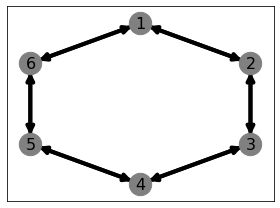

In [7]:
plot_input_diagram(G, pos)

As you can see, there are now 6 states (nodes) with 6 double-edged arrows between each consecutive pair, exactly like we wanted. To view the information in each arrow/process: 

In [8]:
# To view all edge data:
print(G.edges(data=True))

[(0, 1, {'k': 2}), (0, 5, {'k': 37}), (1, 0, {'k': 3}), (1, 2, {'k': 5}), (2, 1, {'k': 7}), (2, 3, {'k': 11}), (3, 2, {'k': 13}), (3, 4, {'k': 17}), (4, 3, {'k': 19}), (4, 5, {'k': 23}), (5, 4, {'k': 29}), (5, 0, {'k': 31})]


In [9]:
# Or create a list of all edges in your diagram
edges = list(G.edges())
print("Edges:", edges)

Edges: [(0, 1), (0, 5), (1, 0), (1, 2), (2, 1), (2, 3), (3, 2), (3, 4), (4, 3), (4, 5), (5, 4), (5, 0)]


In [10]:
# With this list you can iterate through to view the edge data
# These are 3D graphs, so the 3rd dimension for this case is just 0
for e in edges:
    print("Edge: {}, Data: {}".format(e, G[e[0]][e[1]][0]))

Edge: (0, 1), Data: {'k': 2}
Edge: (0, 5), Data: {'k': 37}
Edge: (1, 0), Data: {'k': 3}
Edge: (1, 2), Data: {'k': 5}
Edge: (2, 1), Data: {'k': 7}
Edge: (2, 3), Data: {'k': 11}
Edge: (3, 2), Data: {'k': 13}
Edge: (3, 4), Data: {'k': 17}
Edge: (4, 3), Data: {'k': 19}
Edge: (4, 5), Data: {'k': 23}
Edge: (5, 4), Data: {'k': 29}
Edge: (5, 0), Data: {'k': 31}


In [11]:
# If you want to see a specific weight just remember they are now index zero
print("k12 =", G[0][1][0]['k'])
print("k12 =", k12)
print("k43 =", G[3][2][0]['k'])
print("k43 =", k43)

k12 = 2
k12 = 2
k43 = 13
k43 = 13


## Hill Biochemical Kinetic Diagram Analyzer

Now that we have our NetworkX MultiDiGraph created, we can run it through the "Hill Biochemical Kinetic Diagram Analyzer" that will be referred to as "KDA" from now on. The first thing we need to do is find all of the partial diagrams associated with our MultiDiGraph, G:

In [12]:
import hill_biochemical_kinetic_diagram_analyzer as kda
# Generate all partial diagrams
partials = kda.generate_partial_diagrams(G)

Now plot:

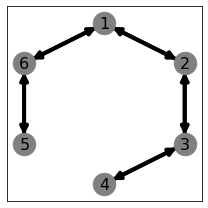

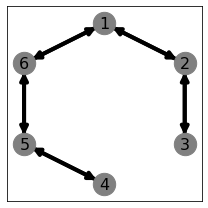

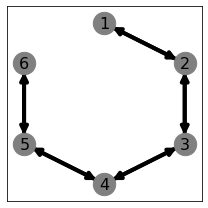

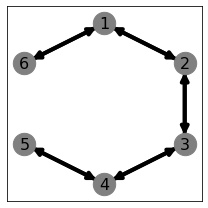

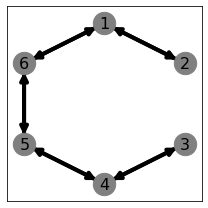

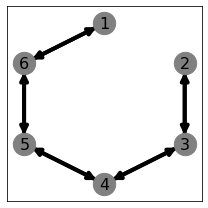

In [13]:
from plotting import plot_partials
# Plot all partial diagrams
plot_partials(partials, pos)

You will notice that there are a total of 6 unique diagrams here, where each one has a pair of directional edges missing between different pairs of nodes. This is exactly what we would expect for this case because a partial diagram has N-1 unique edges, where N is the number of states and a "unique edge" is just one of the unique pairs (i.e. there is only one unique edge between states 1 and 2 even though there are technically 2 edges between those states). With this set of partial diagrams, we can generate all of the "directional partial diagrams", which are the set of diagrams that represent every combination of ways to get from state i to state j without creating a closed loop: 

In [14]:
# Generate all directional partial diagrams
directional_partials = kda.generate_directional_partial_diagrams(partials)

Now plot:

C:\Users\nikol\phy495\hill-biochemical-kinetic-diagram-analyzer\code\plotting.py:76: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1 = plt.figure(figsize=(3, 3), tight_layout=True)


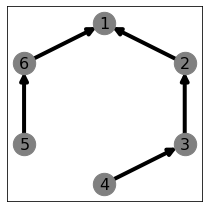

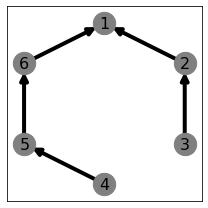

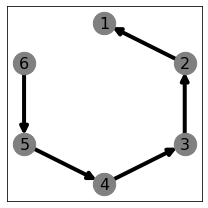

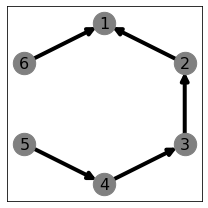

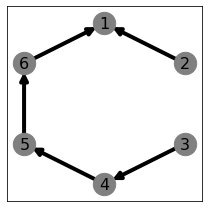

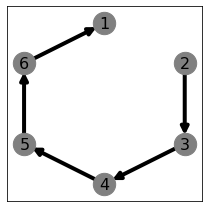

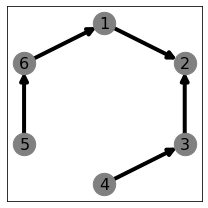

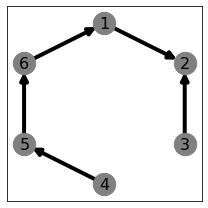

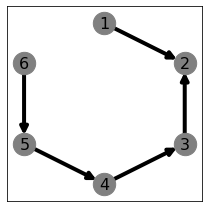

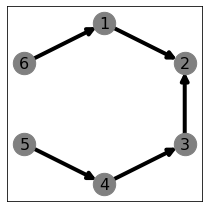

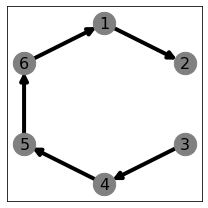

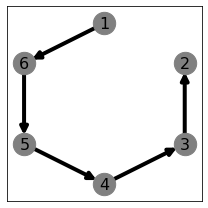

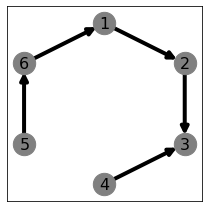

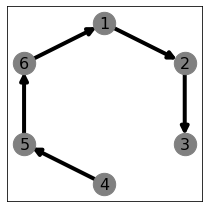

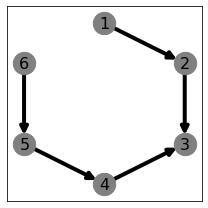

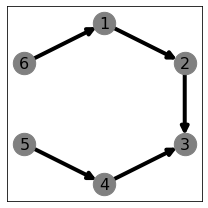

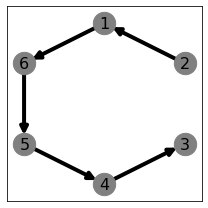

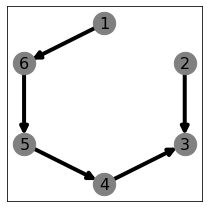

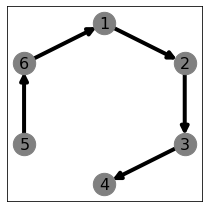

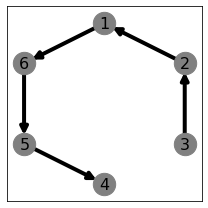

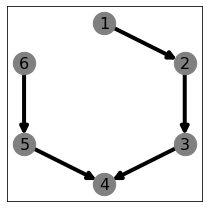

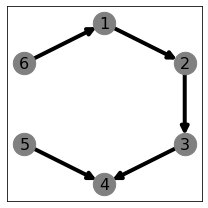

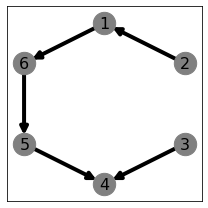

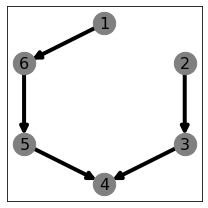

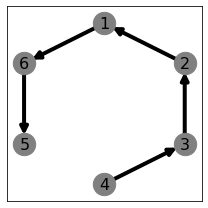

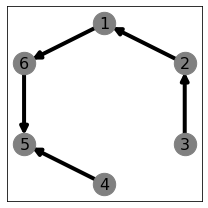

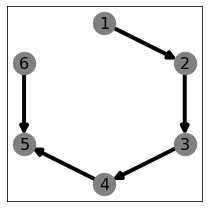

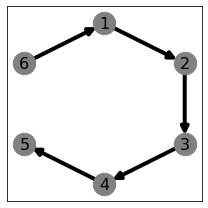

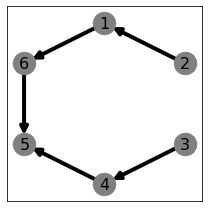

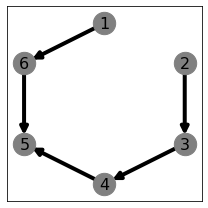

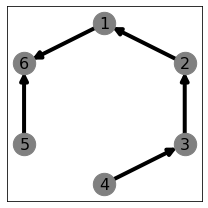

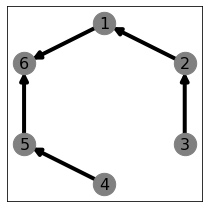

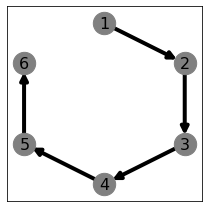

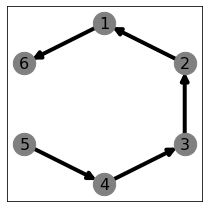

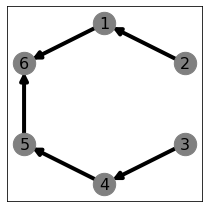

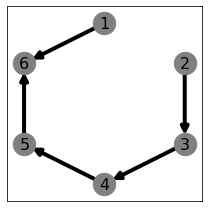

In [15]:
from plotting import plot_directional_partials
# Plot all directional partial diagrams
plot_directional_partials(directional_partials, pos)

If you count these up you will notice that there are 36 total directional partial diagrams associated with our MultiDiGraph, G. This makes perfect sense. For each partial diagram, there are 6 different states to "target", meaning there are 6 graphs to construct from each partial diagram, so 6 x 6 = 36. So what can we do with these? Well, according to Hill, we can use these graphs to calculate the probability of each state. Effectively each one of these graphs represents a value, and all we have to do is calculate what that value is and recombine them in the right way to calculate these values. Luckily KDA already has a built in function that does this for us:

In [16]:
state_probabilities = kda.calc_state_probabilities(G, directional_partials, key='k')
for t, i in enumerate(state_probabilities):
    print("p{}: {}".format(t+1, i))

p1: 0.13237832684178452
p2: 0.19046941081776997
p3: 0.17985694755122722
p4: 0.17577523091024927
p5: 0.17341213180231463
p6: 0.1481079520766544


With just a few function calls, we went from our graph G to having the state probabilities. But this was done with arbitrary rates, what if we want to calculate these state probabilities with different rates? We could of course go back and change the variable assignments, then run the code again with the new values. But if we do it that way, we are sort of limited to the analytic solution, and are not really able to manipulate it mathematically. The solution: SymPy. With the help of Sympy and KDA, we can generate the analytic functions that relate the rate constants to the state probabilities and manipulate them however we want. To start, we need to use KDA to generate the variable strings to input in to SymPy:

In [17]:
# First we need to create a list of variable names (make sure they match your original assignments)
rate_names = ["x12", "x21", "x23", "x32", "x34", "x43", "x45", "x54", "x56", "x65", "x61", "x16"]
# Now generate these string functions
state_mult_funcs, norm_func = kda.construct_string_funcs(G, directional_partials, rates, rate_names, key='k')

# print functions
for t, i in enumerate(state_mult_funcs):
    print("State {}: {}".format(t+1, i))

State 1: x21*x32*x43*x56*x61+x21*x32*x45*x56*x61+x21*x32*x43*x54*x65+x21*x32*x43*x54*x61+x21*x34*x45*x56*x61+x23*x34*x45*x56*x61
State 2: x12*x32*x43*x56*x61+x12*x32*x45*x56*x61+x12*x32*x43*x54*x65+x12*x32*x43*x54*x61+x12*x34*x45*x56*x61+x16*x32*x43*x54*x65
State 3: x12*x23*x43*x56*x61+x12*x23*x45*x56*x61+x12*x23*x43*x54*x65+x12*x23*x43*x54*x61+x16*x21*x43*x54*x65+x16*x23*x43*x54*x65
State 4: x12*x23*x34*x56*x61+x16*x21*x32*x54*x65+x12*x23*x34*x54*x65+x12*x23*x34*x54*x61+x16*x21*x34*x54*x65+x16*x23*x34*x54*x65
State 5: x16*x21*x32*x43*x65+x16*x21*x32*x45*x65+x12*x23*x34*x45*x65+x12*x23*x34*x45*x61+x16*x21*x34*x45*x65+x16*x23*x34*x45*x65
State 6: x16*x21*x32*x43*x56+x16*x21*x32*x45*x56+x12*x23*x34*x45*x56+x16*x21*x32*x43*x54+x16*x21*x34*x45*x56+x16*x23*x34*x45*x56


kda.construct_string_funcs() outputs 2 different strings. The first is a list of multiplicity functions for each state, and the second is the normalization factor for the multiplicity functions (normalized to 1). The normalization function is simply the sum of all the state multiplicity functions. With all of these, we can create our SymPy functions:

In [18]:
from sympy import *
sympy_funcs = kda.construct_sympy_funcs(state_mult_funcs, norm_func)

# Function for state 1
sympy_funcs[0]

(x21*x32*x43*x54*x61 + x21*x32*x43*x54*x65 + x21*x32*x43*x56*x61 + x21*x32*x45*x56*x61 + x21*x34*x45*x56*x61 + x23*x34*x45*x56*x61)/(x12*x23*x34*x45*x56 + x12*x23*x34*x45*x61 + x12*x23*x34*x45*x65 + x12*x23*x34*x54*x61 + x12*x23*x34*x54*x65 + x12*x23*x34*x56*x61 + x12*x23*x43*x54*x61 + x12*x23*x43*x54*x65 + x12*x23*x43*x56*x61 + x12*x23*x45*x56*x61 + x12*x32*x43*x54*x61 + x12*x32*x43*x54*x65 + x12*x32*x43*x56*x61 + x12*x32*x45*x56*x61 + x12*x34*x45*x56*x61 + x16*x21*x32*x43*x54 + x16*x21*x32*x43*x56 + x16*x21*x32*x43*x65 + x16*x21*x32*x45*x56 + x16*x21*x32*x45*x65 + x16*x21*x32*x54*x65 + x16*x21*x34*x45*x56 + x16*x21*x34*x45*x65 + x16*x21*x34*x54*x65 + x16*x21*x43*x54*x65 + x16*x23*x34*x45*x56 + x16*x23*x34*x45*x65 + x16*x23*x34*x54*x65 + x16*x23*x43*x54*x65 + x16*x32*x43*x54*x65 + x21*x32*x43*x54*x61 + x21*x32*x43*x54*x65 + x21*x32*x43*x56*x61 + x21*x32*x45*x56*x61 + x21*x34*x45*x56*x61 + x23*x34*x45*x56*x61)

As you can see these functions are quite messy, and even though they are simple rational functions, they are not easy to write down. The nice thing about SymPy is it allows you to simplify these functions by relabeling variables and simplifying the expressions. For example, if you knew that x23 = x32 = x56 = x65, x21 = x61 = x54 = x34,  and x16 = x12 = x45 = x43. With this knowledge you could simplify these expressions considerably. 

In [19]:
# Tell SymPy you want 3 new variables, 'k_conf', 'k_off', and 'k_on'
x, y, z = symbols('k_conf k_off k_on')

# Also tell SymPy you want to use the variables you started with
x12, x21, x23, x32, x34, x43, x45, x54, x56, x65, x61, x16 = symbols("x12 x21 x23 x32 x34 x43 x45 x54 x56 x65 x61 x16")

# create dictionary of variable substitutions
# keys are the original variables, the values are the new variable
sub_dict = {x23: x, 
            x32: x,
            x56: x,
            x65: x,
            x21: y,
            x61: y,
            x54: y,
            x34: y,
            x16: z,
            x12: z,
            x45: z,
            x43: z}

# Now convert the expressions for every state
new_sympy_funcs = []
for func in sympy_funcs:
    new_sympy_funcs.append(func.subs(sub_dict))

# Print
new_sympy_funcs[0]

(4*k_conf**2*k_off**2*k_on + 2*k_conf*k_off**3*k_on)/(8*k_conf**2*k_off**2*k_on + 16*k_conf**2*k_off*k_on**2 + 4*k_conf*k_off**3*k_on + 8*k_conf*k_off**2*k_on**2)

Now we can use SymPy to simplify these expressions:

In [20]:
# Now simplify the expressions for all states
new_sympy_funcs = []
for func in sympy_funcs:
    new_sympy_funcs.append(simplify(func.subs(sub_dict)))

# Print
for func in new_sympy_funcs:
    print(func)

k_off/(2*(k_off + 2*k_on))
k_on/(2*(k_off + 2*k_on))
k_on/(2*(k_off + 2*k_on))
k_off/(2*(k_off + 2*k_on))
k_on/(2*(k_off + 2*k_on))
k_on/(2*(k_off + 2*k_on))


You will notice that with this variable change, the conformational change rate drops out completely. The probabilities are solely determined by the binding and unbinding rates. 

From here, we want to be able to plug in values to calculate our state probabilities. SymPy does allow you to plug in values to these expressions using the same substitution methods we just used, but who wants to do all of that? Instead, KDA uses the SymPy "lambdify" function to turn these expressions into normal Python functions:

In [21]:
# Make a list of the relevant variable names
var_names = ['k_off', 'k_on']

# Construct lambdify functions
python_prob_funcs = kda.construct_lambdify_funcs(new_sympy_funcs, var_names)

# Assign values to new variables
k_off = 1e2
k_on = 2e3

# Calculate state probabilities from functions
state_probs_lambdify = []
for func in python_prob_funcs:
    state_probs_lambdify.append(func(k_off, k_on))
state_probs_lambdify

[0.012195121951219513,
 0.24390243902439024,
 0.24390243902439024,
 0.012195121951219513,
 0.24390243902439024,
 0.24390243902439024]

It's worth noting that once you have 'lambdified' your functions, there is no way to further manipulate them mathematically. Let's say you forgot that your binding rates, $k_{on}$, are actually concentration dependent pseudo-first order rates and are unique:

In [22]:
# Tell SymPy you want 6 new variables
x, y, z1, z2, z3, z4 = symbols('k_conf k_off k_Ain k_Aout k_Bin k_Bout')

# Again, tell SymPy you want to use the variables you started with
x12, x21, x23, x32, x34, x43, x45, x54, x56, x65, x61, x16 = symbols("x12 x21 x23 x32 x34 x43 x45 x54 x56 x65 x61 x16")

# create dictionary of variable substitutions
# keys are the original variables, the values are the new variable
sub_dict = {x23: x, 
            x32: x,
            x56: x,
            x65: x,
            x21: y,
            x61: y,
            x54: y,
            x34: y,
            x43: z1,
            x12: z2,
            x45: z3,
            x16: z4}

# Now convert the expressions for every state
new_sympy_funcs = []
for func in sympy_funcs:
    new_sympy_funcs.append(func.subs(sub_dict))

# Print
new_sympy_funcs[0]

(2*k_Ain*k_conf**2*k_off**2 + k_Ain*k_conf*k_off**3 + 2*k_Bin*k_conf**2*k_off**2 + k_Bin*k_conf*k_off**3)/(4*k_Ain*k_Aout*k_conf**2*k_off + 2*k_Ain*k_Aout*k_conf*k_off**2 + 4*k_Ain*k_Bout*k_conf**2*k_off + 2*k_Ain*k_Bout*k_conf*k_off**2 + 2*k_Ain*k_conf**2*k_off**2 + k_Ain*k_conf*k_off**3 + 4*k_Aout*k_Bin*k_conf**2*k_off + 2*k_Aout*k_Bin*k_conf*k_off**2 + 2*k_Aout*k_conf**2*k_off**2 + k_Aout*k_conf*k_off**3 + 4*k_Bin*k_Bout*k_conf**2*k_off + 2*k_Bin*k_Bout*k_conf*k_off**2 + 2*k_Bin*k_conf**2*k_off**2 + k_Bin*k_conf*k_off**3 + 2*k_Bout*k_conf**2*k_off**2 + k_Bout*k_conf*k_off**3)

Now we can use SymPy to simplify these expressions:

In [23]:
# Now simplify the expressions for all states
new_sympy_funcs = []
for func in sympy_funcs:
    new_sympy_funcs.append(simplify(func.subs(sub_dict)))

# Print
new_sympy_funcs[0]

k_off*(k_Ain + k_Bin)/(2*k_Ain*k_Aout + 2*k_Ain*k_Bout + k_Ain*k_off + 2*k_Aout*k_Bin + k_Aout*k_off + 2*k_Bin*k_Bout + k_Bin*k_off + k_Bout*k_off)

Like before, use the KDA function to generate your lambdified functions so you can now calculate your state probabilities quickly.

In [24]:
# Make a new list of the same variable names you gave above, in the same order
var_names = ['k_conf', 'k_off', 'k_Ain', 'k_Aout', 'k_Bin', 'k_Bout']

# Construct lambdify functions
python_prob_funcs = kda.construct_lambdify_funcs(new_sympy_funcs, var_names)

k_on = 1e9                         # units:  /s
k_off = 1e6                    # units:  /s
k_conf = 5e6

A_conc = 1e-1                       # total [A], in M
B_conc = 1e-7                       # total [B], in M

A_in = A_conc
B_in = 1e-6
A_out = A_conc
B_out = B_conc

# Assign values to new variables
k_Ain = k_on*A_in
k_Aout = k_on*A_out
k_Bin = k_on*B_in
k_Bout = k_on*B_out

# Calculate state probabilities from functions
state_probs_lambdify = []
for func in python_prob_funcs:
    state_probs_lambdify.append(func(k_conf, k_off, k_Ain, k_Aout, k_Bin, k_Bout))
state_probs_lambdify

[0.004950490368593535,
 0.49504701167900006,
 0.4950466066429293,
 0.004950445814625757,
 2.925265461095574e-06,
 2.5202293903895374e-06]

Now that we have the simplified analytic functions to calculate the state probabilities of our original diagram, how do we verify these probabilities are correct? There are several methods, but perhaps the most straight-forward is by integration.

## ODE Integration

A common approach to this type of problem is to create a set of first order linear differential equations that correspond to each state, and integrate these equations. For the above simplified case, you end up with the following equations:

$$ \frac{d}{dt}p_1 = p_2 k_{off} + p_6 k_{off} - p_1 k'_{on}([A]_{out}) - p_1 k'_{on}([B]_{out})$$

$$ \frac{d}{dt}p_2 = p_3 k_{conf} + p_1 k'_{on}([A]_{out}) - p_2 k_{off} - p_2 k_{conf} $$

$$ \frac{d}{dt}p_3 = p_2 k_{conf} + p_4 k'_{on}([A]_{in}) - p_3 k_{off} - p_3 k_{conf} $$

$$ \frac{d}{dt}p_4 = p_3 k_{off} + p_5 k_{off} - p_4 k'_{on}([A]_{in}) - p_4 k'_{on}([B]_{in}) $$

$$ \frac{d}{dt}p_5 = p_6 k_{conf} + p_4 k'_{on}([B]_{in}) - p_5 k_{off} - p_5 k_{conf} $$

$$ \frac{d}{dt}p_6 = p_5 k_{conf} + p_1 k'_{on}([B]_{out}) - p_6 k_{off} - p_6 k_{conf} $$

These equations come from constructing a rate matrix that I will call the 'k-matrix' from now on. Your k-matrix is simply the matrix of all your rate constants, where the element $k_{ij}$ corresponds to the rate going from state $i$ to state $j$:

$$
K=
  \begin{bmatrix}
    k_{11} & k_{12} & k_{13} & k_{14} & k_{15} & k_{16}\\
    k_{21} & k_{22} & k_{23} & k_{24} & k_{25} & k_{26}\\
    k_{31} & k_{32} & k_{33} & k_{34} & k_{35} & k_{36}\\
    k_{41} & k_{42} & k_{43} & k_{44} & k_{45} & k_{46}\\
    k_{51} & k_{52} & k_{53} & k_{54} & k_{55} & k_{55}\\
    k_{61} & k_{62} & k_{63} & k_{64} & k_{65} & k_{65}
  \end{bmatrix}
$$

This is the general form, but if we plug in the values for our specific case, we get:

$$
K= 
  \begin{bmatrix}
    0 & k_{12}       & 0            & 0            & 0            & k_{16}      \\
    k_{21}       & 0 & k_{23}       & 0            & 0            & 0           \\
    0            & k_{32}       & 0 & k_{34}       & 0            & 0           \\
    0            & 0            & k_{43}       & 0 & k_{45}       & 0           \\
    0            & 0            & 0            & k_{54}       & 0 & k_{56}      \\
    k_{61}       & 0            & 0            & 0            & k_{65}       & 0   
  \end{bmatrix}
$$

From here, one would have to take the transpose of $K$ and set all of the diagonal terms equal to the negative of the sum of the elements in their row. This creates a matrix that can be multiplied by a state probability matrix to generate the differential equations above. 

$$
K_{converted}= 
  \begin{bmatrix}
    -(k_{12}+k_{16}) & k_{21}       & 0            & 0            & 0            & k_{61}      \\
    k_{12}       & -(k_{21}+k_{23}) & k_{32}       & 0            & 0            & 0           \\
    0            & k_{23}       & -(k_{32}+k_{34}) & k_{43}       & 0            & 0           \\
    0            & 0            & k_{34}       & -(k_{43}+k_{45}) & k_{54}       & 0           \\
    0            & 0            & 0            & k_{45}       & -(k_{54}+k_{56}) & k_{65}      \\
    k_{16}       & 0            & 0            & 0            & k_{56}       & -(k_{61}+k_{65})   
  \end{bmatrix}
$$

Now dot $K_{converted}$ with the state matrix to get the time-derivatives of the states:

$$
    \begin{bmatrix}
    \dot{p_1}\\
    \dot{p_2}\\
    \dot{p_3}\\
    \dot{p_4}\\
    \dot{p_5}\\
    \dot{p_6}
    \end{bmatrix}
=
    \begin{bmatrix}
    -(k_{12}+k_{16}) & k_{21}       & 0            & 0            & 0            & k_{61}      \\
    k_{12}       & -(k_{21}+k_{23}) & k_{32}       & 0            & 0            & 0           \\
    0            & k_{23}       & -(k_{32}+k_{34}) & k_{43}       & 0            & 0           \\
    0            & 0            & k_{34}       & -(k_{43}+k_{45}) & k_{54}       & 0           \\
    0            & 0            & 0            & k_{45}       & -(k_{54}+k_{56}) & k_{65}      \\
    k_{16}       & 0            & 0            & 0            & k_{56}       & -(k_{61}+k_{65})   
    \end{bmatrix}
    \begin{bmatrix}
    p_1\\
    p_2\\
    p_3\\
    p_4\\
    p_5\\
    p_6
    \end{bmatrix}
$$

Now this is level of depth is not required to move further, but it is important to know how to generate the equations associated with a given diagram. In order to integrate the FOLDE's above, we simply need to construct our k-matrix:

In [25]:
# Copied and pasted from above:
k_on = 1e9     # units:  /s
k_off = 1e6    # units:  /s
k_conf = 5e6

A_conc = 1e-1   # total [A], in M
B_conc = 1e-7   # total [B], in M

A_in = A_conc
B_in = B_conc*1e1   # Add a concentration gradient in/out of the cell
A_out = A_conc
B_out = B_conc

# Assign values to new variables
k_Ain = k_on*A_in
k_Aout = k_on*A_out
k_Bin = k_on*B_in
k_Bout = k_on*B_out

# Recall the prior substitutions:

k23 = k_conf 
k32 = k_conf
k56 = k_conf
k65 = k_conf
k21 = k_off
k61 = k_off
k54 = k_off
k34 = k_off
k43 = k_Ain
k12 = k_Aout
k45 = k_Bin
k16 = k_Bout

# Construct k-matrix
K = np.array([[  0, k12,   0,   0,   0, k16],
              [k21,   0, k23,   0,   0,   0],
              [  0, k32,   0, k34,   0,   0],
              [  0,   0, k43,   0, k45,   0],
              [  0,   0,   0, k54,   0, k56],
              [k61,   0,   0,   0, k65,   0]])

Now that we have our k-matrix, we need to create our probability matrix and develop the parameters for our integrator:

In [26]:
# Parameters for integrator
t_max = 3e-5                       # total integration time, in seconds
max_step = t_max/1e3               # maximum time between integration steps (RK45)
P = np.array([1, 2, 3, 4, 5, 6])   # Create probability array with random probabilities 
norm = P.sum(axis=0)               # Calculate normalization factor
P = P/norm                         # Normalize P

With all of our inputs set, we just need to integrate:

In [27]:
from hill_biochemical_kinetic_diagram_analyzer import solve_ODE

# Integrate
results = solve_ODE(P, K, t_max, max_step)   

The results contain the time-series of all 6 state probabilities as well as time and integrator information. We want to look at the overall behavior of the probabilities as a function of time, as well as the final state probability values for comparison to our lambdified function variants.

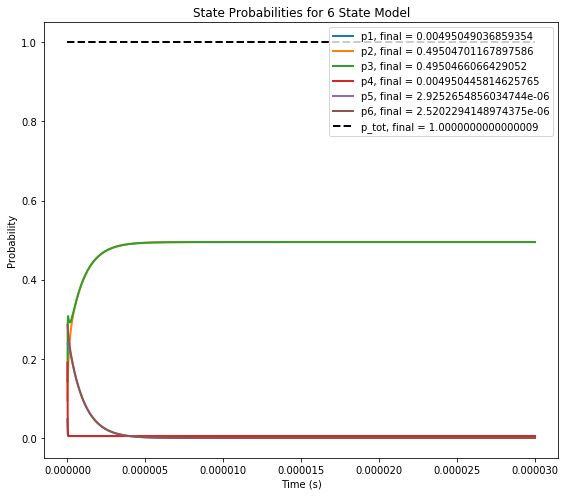

In [28]:
# Store the time-series of the state probabilities
prob_time_series = results.y[:6]  # slice the first 6 results from the returned y(t)

# Now plot your state probabilities over time to verify they had sufficient integration time to relax
from plotting import plot_ODE_probs
plot_ODE_probs(results)

In [29]:
# Make a list of final state probabilities 
ODE_final_probs = []
for state in prob_time_series:
    ODE_final_probs.append(state[-1])

# Relative error of ODE probabilities compared to lambdify probabilities, lambdify is considered the theoretical case
np.abs(np.array(state_probs_lambdify) - np.array(ODE_final_probs))*100/np.array(state_probs_lambdify)

array([1.05124342e-13, 4.88900273e-12, 4.87779342e-12, 1.57687932e-13,
       8.37800906e-07, 9.72447198e-07])

As you can see, the relative errors between the lambdified function probabilities and the ODE solver probabilities are very small, but non-zero. This makes sense since the ODE solver is merely estimating the values whereas the lambdified functions are using the analytic solution. 

The probability integrator is sensitive to the integration time, $t_{max}$, such that too small of integration times don't allow the integrator to relax to the final values but integrating for too long accumulates error. This integrator uses the SciPy.integrate.solve_ivp() function, which does allow you to set a tolerance for the error accumulated per step since it uses the RK45 algorithm. But with KDA you don't have to worry about these things, it simply outputs the final functional form and you can manipulate it to your liking. 

Additionally, to calculate state probabilities using the ODE solver, you have to change the variables above and run the integrator again. The problem is that the integration time also depends on the order of the k-matrix values, meaning larger values require longer integration times and smaller values require shorter integration times. Therefore, if the k-matrix values are changed substantially, one would have to use a trial and error method to find a good $t_{max}$ value. The issue with this is that if this is the only method being used, there is no way to know for sure that the estimation of the final state probabilities is accurate because there is no reference values to check against. This process is much more involved than plugging in values to a lambdified function. 